### Predicting Employee Churn

Employee churn refers to the loss or exit of talented individuals from a company or organization. Simply put, it's when employees leave a company. More broadly, it can also describe when any member leaves a particular group or population.

Studies have shown that factors influencing employee turnover include age, length of service, compensation, job satisfaction, salary, work environment, career growth potential, and perceived fairness. Additionally, demographic factors such as age, gender, ethnicity, education level, and marital status play a significant role in predicting employee churn.

In [10]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#### Exploratory Analysis

In [39]:
df = pd.read_csv('data/HR_comma_sep.csv')
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


satisfaction_level: It is employee satisfaction point, which ranges from 0-1.

last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.

number_projects: How many numbers of projects assigned to an employee?

average_monthly_hours: How many average numbers of hours worked by an employee in a month?

time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.

work_accident: Whether an employee has had a work accident or not.

promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.

Departments: Employee's working department/division.

Salary: Salary level of the employee such as low, medium and high.

left: Whether the employee has left the company or not.

In [13]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In the given dataset, we have two types of employee one who stayed and another who left the company.
So, we can divide data into two groups and compare their characteristics

In [14]:
left = df.groupby('left')[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident','promotion_last_5years']]
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Employees who left the company had low satisfaction level, low promotion rate, low salary, and worked more compare to who stayed in the company.

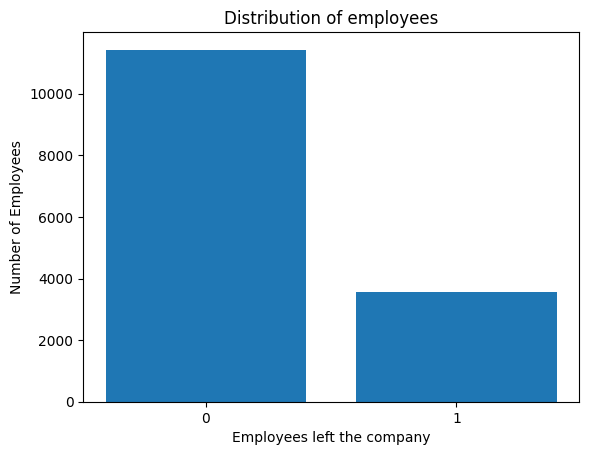

In [45]:
categories,values = df['left'].value_counts().index, df['left'].value_counts().values
plt.bar(x=categories,height=values,tick_label=[0,1])
plt.xlabel('Employees left the company')
plt.ylabel('Number of Employees')
plt.title('Distribution of employees')
plt.show()

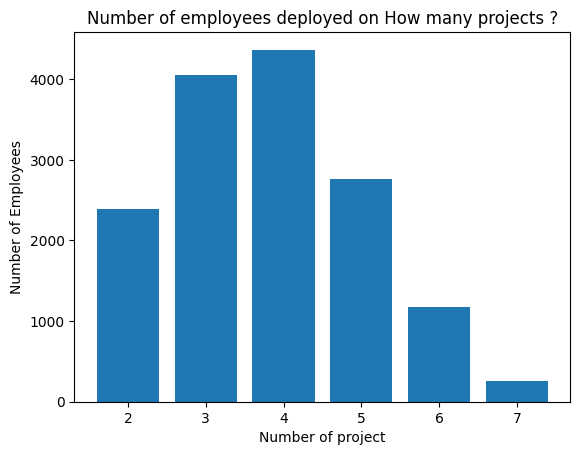

In [48]:
categories, values = df['number_project'].value_counts().index, df['number_project'].value_counts().values
plt.bar(x=categories,height=values)
plt.xlabel('Number of project')
plt.ylabel('Number of Employees')
plt.title('Number of employees deployed on How many projects ?')
plt.show()

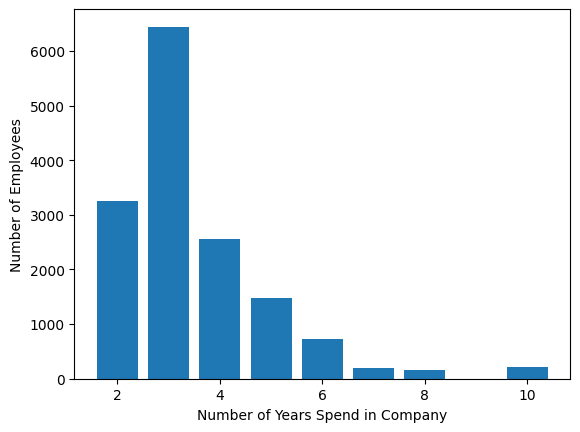

In [49]:
time_spent = df.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

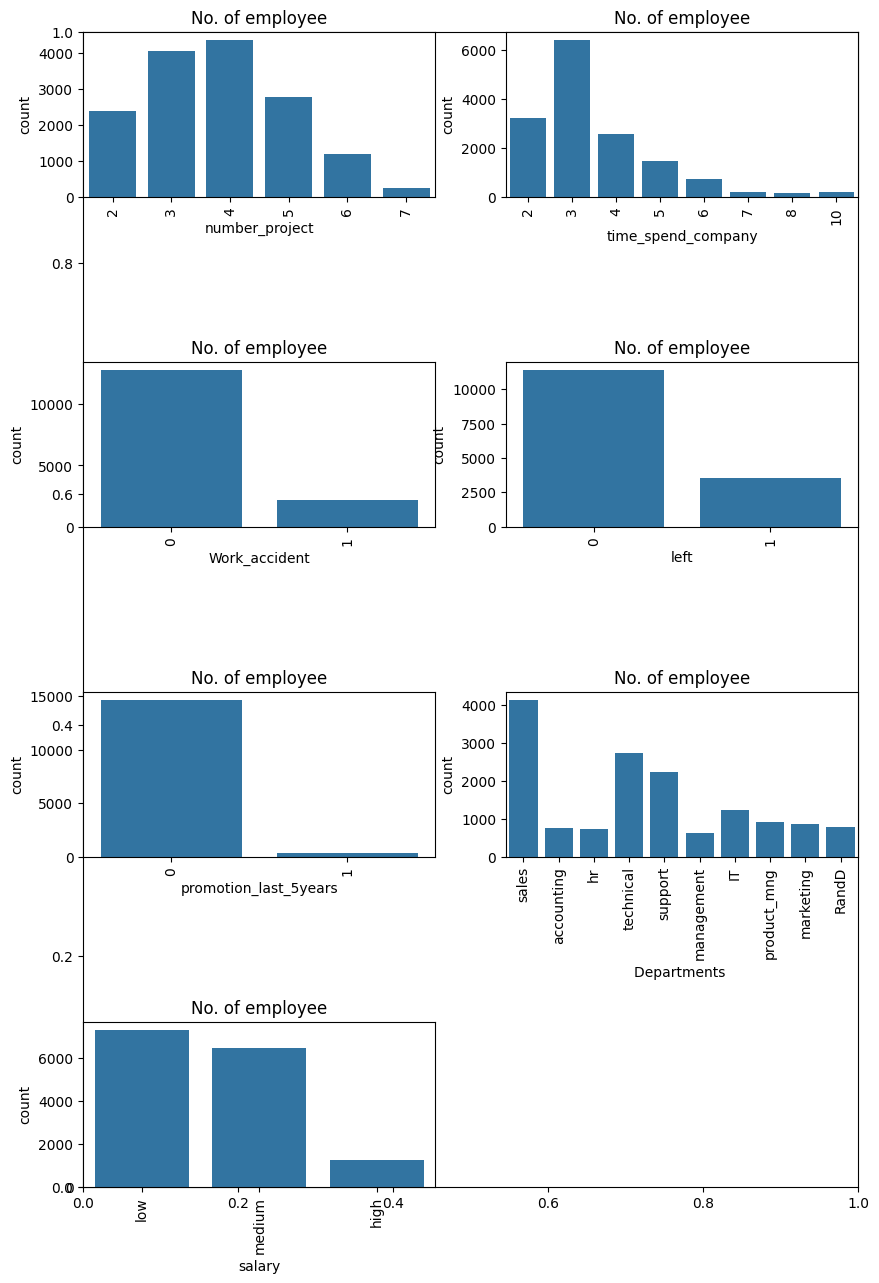

In [50]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")


#### Cluster Analysis

Let's find out the groups of employees who left. We can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. 
So let's bunch them in the group of people using cluster analysis.

In [53]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [55]:
df_left = df[['satisfaction_level','last_evaluation']][df['left']==1]
kmeans = KMeans(n_clusters=3,random_state=0).fit(df_left)

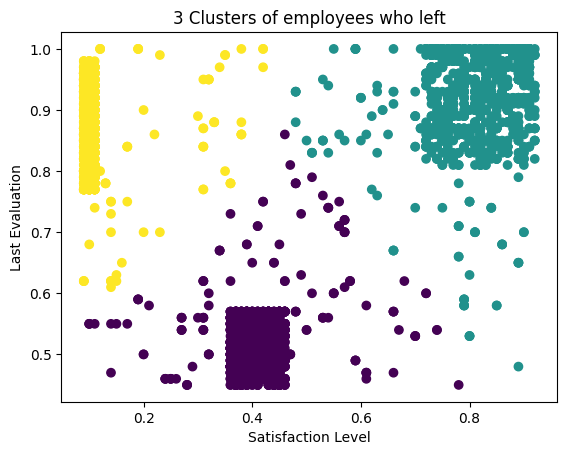

In [56]:
df_left['label'] = kmeans.labels_
plt.scatter(df_left['satisfaction_level'],df_left['last_evaluation'],c=df_left['label'])
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

Here, Employee who left the company can be grouped into 3 type of employees:

High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.

Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.

Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

### Preprocessing data for building ML model

In [40]:
le = LabelEncoder()

df['salary'] = le.fit_transform(df['salary'])
#df['Departments '] = le.fit_transform(df['Departments '])

In [36]:
liste = df['Departments '].value_counts().index
print(liste)
print('-')
print(le.inverse_transform(liste))

Index([7, 9, 8, 0, 6, 5, 1, 2, 3, 4], dtype='int64', name='Departments ')
-
['sales' 'technical' 'support' 'IT' 'product_mng' 'marketing' 'RandD'
 'accounting' 'hr' 'management']


In [41]:
liste = df['salary'].value_counts().index
print(liste)
print('-')
print(le.inverse_transform(liste))

Index([1, 2, 0], dtype='int64', name='salary')
-
['low' 'medium' 'high']


In [16]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1


In [17]:
X = df.drop('left',axis=1)
y = df['left']

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [86]:
gradient_boosting_classifier = GradientBoostingClassifier()
gradient_boosting_classifier.fit(X_train,y_train)

GradientBoostingClassifier()

In [96]:
y_pred_gbc = gradient_boosting_classifier.predict(X_test)
print('Accuracy of Gradient Boosting classifier : {}'.format(accuracy_score(y_pred_gbc,y_test)))
print('Recall of Gradient Boosting classifier : {}'.format(recall_score(y_pred_gbc,y_test)))
print('Precision of Gradient Boosting classifier : {}'.format(precision_score(y_pred_gbc,y_test)))
print('F1 score of of Gradient Boosting classifier : {}'.format(f1_score(y_pred_gbc,y_test)))

Accuracy of Gradient Boosting classifier : 0.9715555555555555
Recall of Gradient Boosting classifier : 0.958252427184466
Precision of Gradient Boosting classifier : 0.9207089552238806
F1 score of of Gradient Boosting classifier : 0.9391056137012369


In [91]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3428
           1       0.96      0.92      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [87]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [97]:
y_pred_rf = random_forest_classifier.predict(X_test)
print('Accuracy of Random Forest classifier : {}'.format(accuracy_score(y_pred_rf,y_test)))
print('Recall of Random Forest classifier : {}'.format(recall_score(y_pred_rf,y_test)))
print('Precision of Random Forest classifier : {}'.format(precision_score(y_pred_rf,y_test)))
print('F1 score of Random Forest classifier : {}'.format(f1_score(y_pred_rf,y_test)))

Accuracy of Random Forest classifier : 0.9877777777777778
Recall of Random Forest classifier : 0.9922555663117134
Precision of Random Forest classifier : 0.9561567164179104
F1 score of Random Forest classifier : 0.9738717339667459


In [92]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [100]:
X_train.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
12602,0.1,0.84,7,250,4,0,0,6,1


In [131]:
new_employee = np.array([[0.40, 0.45, 3, 14, 1, 0, 0, 4, 1]])
prediction = random_forest_classifier.predict(new_employee)

c:\Users\21261\Desktop\Python codes\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [132]:
if prediction==0:
    print('The Employee will not left the company')
else:
    print('The employee will left')

The Employee will not left the company


#### Let's build a web application machine learning with streamlit 

In [134]:
import pickle
pickle.dump(random_forest_classifier,open('random_forest_classifier.pkl','wb'))